# TODO:

Try:

* Different models:
  * Sarsa Linear (done)
  * Sarsa ANN (done)
  * Q-learning Linear (done)
  * Q-learning ANN without experience replay (done)
  * Q-learning ANN with experience replay (done)
  * Q-learning ANN with experience replay and policy/target network split?
* Different loss functions:
  * MSE -> leads to updates as in Sutton, Barto
  * SmoothL1?
  * What do they use in DQN paper?

In [1]:
import sys
sys.path.append("..")
from models import *
from rl_algos import *
from utils import *
import gymnasium as gym
from torch import optim

# Settings

In [2]:
ENVIRONMENT_ID = "CartPole-v1"
NUM_EPISODES = 1000
GRAD_CLIP_VALUE = 100
MEMORY_SIZE = 10000
BATCH_SIZE = 64
GAMMA = 0.99
EPS_START = 1
EPS_END = 0.05
EPS_DECAY = 0.995
NN_HIDDEN_LAYER_SIZES = [24, 24]
RNG_SEED = 7
NUM_STEPS_BETWEEN_TARGET_MODEL_UPDATES = 500
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("PyTorch device:", device)
torch.manual_seed(RNG_SEED)
random.seed(RNG_SEED)

PyTorch device: cuda


# Sarsa

## Linear model

Average return per episode: 21.161


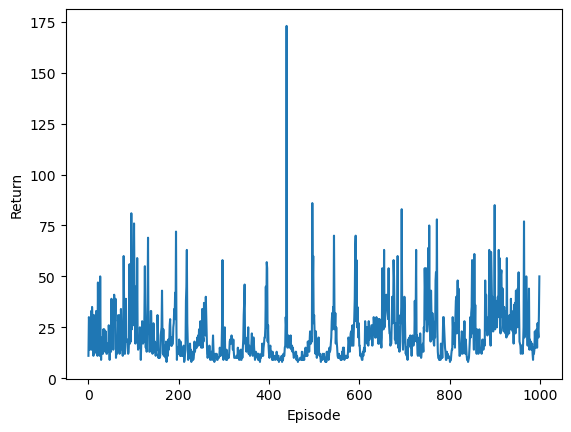

In [3]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = nn.Linear(env.observation_space.shape[0], env.action_space.n).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_sarsa(
    env, model, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, EPS_DECAY, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

## Neural network model

Average return per episode: 89.446


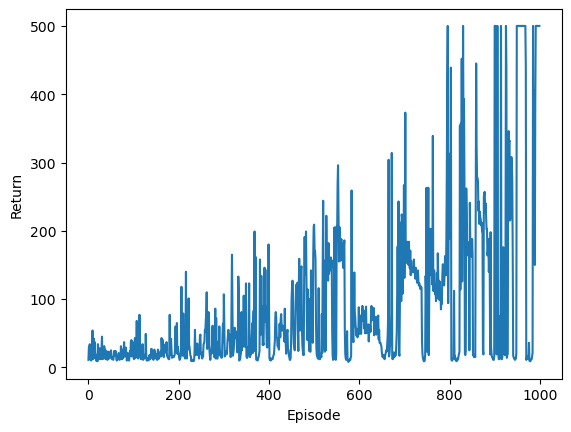

In [4]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_sarsa(
    env, model, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, EPS_DECAY, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

# Q-learning

## Linear model

Average return per episode: 22.079


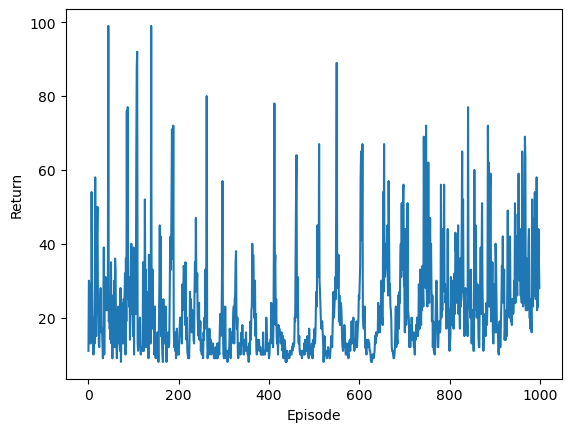

In [5]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = nn.Linear(env.observation_space.shape[0], env.action_space.n).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning(
    env, model, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, EPS_DECAY, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

## Neural network model

Average return per episode: 69.327


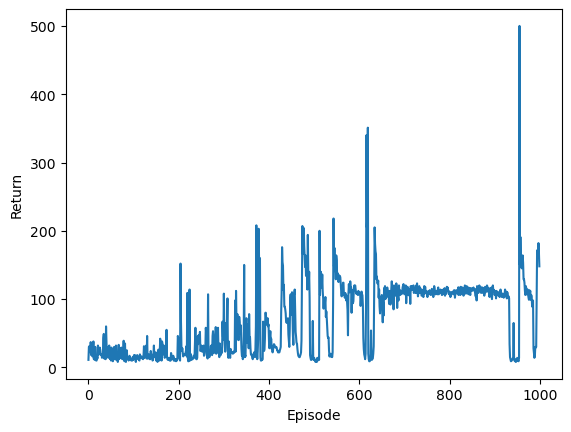

In [6]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning(
    env, model, loss_func, optimizer, device, RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, EPS_DECAY, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

# Q-learning with experience replay

## Linear model

Average return per episode: 25.327


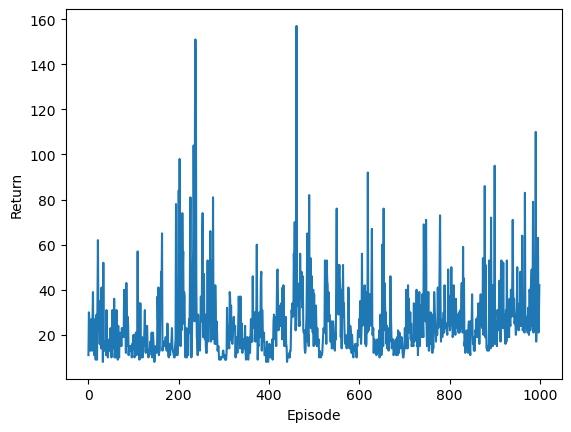

In [7]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = nn.Linear(env.observation_space.shape[0], env.action_space.n).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning_exp_replay(
    env, model, model, loss_func, optimizer, device,
    RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, EPS_DECAY, MEMORY_SIZE, BATCH_SIZE, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

## Neural network model

In [8]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
model = create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning_exp_replay(
    env, model, model, loss_func, optimizer, device,
    RNG_SEED, NUM_EPISODES, GAMMA, EPS_START, EPS_END, EPS_DECAY, MEMORY_SIZE, BATCH_SIZE, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

## Two duplicate neural network models (policy network + target network)

The weights of the target network are updated to duplicate the weights of the policy network every C time steps, and kept frozen in between. This is done to stabilize learning. For more info, see the original DQN paper (Mnih, V., Kavukcuoglu, K., Silver, D. et al. Human-level control through deep reinforcement learning. Nature 518, 529–533 (2015). https://doi.org/10.1038/nature14236), or section 16.5 in the second edition of Reinforcement Learning: An Introduction (second edition, Sutton and Barto).

In [ ]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
policy_net = create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
target_net = create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
optimizer = optim.AdamW(policy_net.parameters(), lr=0.001, amsgrad=True)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning_exp_replay(
    env, policy_net, target_net, loss_func, optimizer, device, RNG_SEED, 300, GAMMA, EPS_START, EPS_END, EPS_DECAY,
    MEMORY_SIZE, BATCH_SIZE, GRAD_CLIP_VALUE, 2000
)
env.close()
plot_returns(returns)

In [ ]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
policy_net = create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
target_net = create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
optimizer = optim.AdamW(policy_net.parameters(), lr=0.001, amsgrad=True)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning_exp_replay(
    env, policy_net, target_net, loss_func, optimizer, device, RNG_SEED, 500, GAMMA,
    EPS_START, EPS_END, EPS_DECAY, MEMORY_SIZE, BATCH_SIZE, GRAD_CLIP_VALUE, 1000
)
env.close()
plot_returns(returns)

In [ ]:
env = gym.make(ENVIRONMENT_ID)
env.action_space.seed(RNG_SEED)
policy_net = create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
target_net = create_simple_nn(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZES).to(device)
optimizer = optim.AdamW(policy_net.parameters(), lr=0.001, amsgrad=True)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning_exp_replay(
    env, policy_net, target_net, loss_func, optimizer, device, RNG_SEED, 1000, GAMMA,
    EPS_START, EPS_END, EPS_DECAY, MEMORY_SIZE, 128, GRAD_CLIP_VALUE, 1000
)
env.close()
plot_returns(returns)